<a href="https://colab.research.google.com/github/mc-ivan/mod8-regresion-lineal/blob/main/notebook/Practica1_RegresionLineal_IvanMamani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1: Regresion Lineal Simple
**Maestria en Ingenieria Matematica**

***MOD8: Modelaje Mediante IA en Economia***

**Participante:** Ivan Mamani Condori

---

Construir un modelo de Machine Learning para pronosticar la conversion con un determinado presupuesto en Facebook adds.

In [1]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Librerias para regresion lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/mc-ivan/mod8-regresion-lineal/main/dataset/facebook_ads_dataset.csv"
df = pd.read_csv(url)

In [3]:
# Verificar los datos
df.head()

,inversion_ads_facebook,conversiones_web
0,199.78,52
1,476.34,132
2,371.36,106
3,307.36,78
4,94.89,56


## Analisis Exploratorio

In [4]:
# Analisis Exploratorio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inversion_ads_facebook  200 non-null    float64
 1   conversiones_web        200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [5]:
# Analisis estadistico basico
df.describe()

,inversion_ads_facebook,conversiones_web
count,200.000000,200.00000
mean,252.322600,73.86500
std,141.547525,37.02582
min,22.650000,3.00000
25%,129.717500,40.75000
50%,257.350000,70.50000
75%,383.290000,106.25000
max,493.710000,149.00000


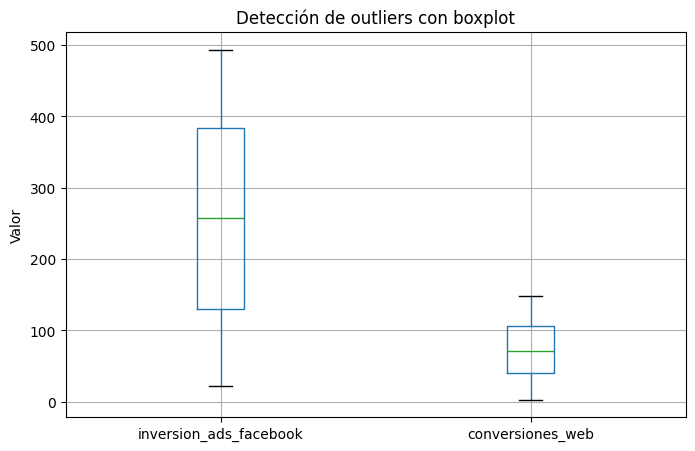

In [6]:
# Gráfico de cajas para verificar outliers
plt.figure(figsize=(8, 5))
df.boxplot()
plt.title("Detección de outliers con boxplot")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

## Definicion de los Datos

In [8]:
# Definicion de variables objetivo
# X = variable independiente (inversión)
# y = variable dependiente (conversiones)
X = df[['inversion_ads_facebook']]
y = df['conversiones_web']

In [10]:
# Dividir datos
# test_size = 0.2 indica el 20% es para pruebas
# random_state = 42, indica que siempre la aleatoriedad sea unica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del Modelo

In [11]:
# Entrenamiento del modelo
modelo_ml = LinearRegression()
modelo_ml.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

## Evaluar el Modelo

In [12]:
# Evaluacion del modelo
y_pred = modelo_ml.predict(X_test.values.reshape(-1, 1))

In [13]:
# Metricas de Evaluacion
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadratico Medio (MSE): {mse}")
print(f"Coeficiente de Determinacion (R^2): {r2}")

Error Cuadratico Medio (MSE): 157.35045202138608
Coeficiente de Determinacion (R^2): 0.8689892577150109


In [14]:
# Obtenemos los coeficientes
print(f"Coeficiente (m): {modelo_ml.coef_[0]}") # B1
print(f"Intercepto (b): {modelo_ml.intercept_}") # B0

Coeficiente (m): 0.25293709792143637
Intercepto (b): 10.021935540243234


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


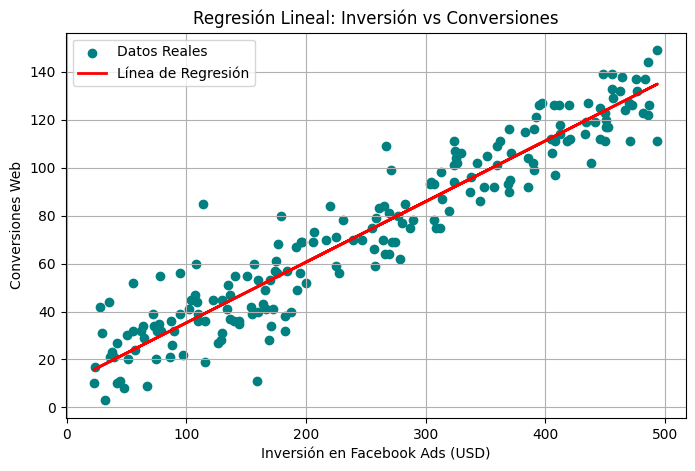

In [19]:
# Visualización del modelo de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='teal', label='Datos Reales')
plt.plot(X, modelo_ml.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel("Inversión en Facebook Ads (USD)")
plt.ylabel("Conversiones Web")
plt.title("Regresión Lineal: Inversión vs Conversiones")
plt.legend()
plt.grid(True)
plt.show()

## Utilizamos el Modelo

In [18]:
# Utilizamos el modelo
X1 = 2000 # Inversion
print(f"Predicción: Para una inversión de ${X1}, se esperan {modelo_ml.predict([[X1]])[0]} conversiones web.")

Predicción: Para una inversión de $2000, se esperan 515.896131383116 conversiones web.
